# Unsupervised Machine Learning - Final Project 
*MSDS - CU Boulder*

Github Repo : https://github.com/SinSuhas/cautious-broccoli

### Problem Statement: 
Given a URL, detect if URL is 'Malicious' or 'Benign'

Method: Using Clustering algorithms and Semi-Supervised learning approaches

### Approach:
1. Acquire a dataset with malicious and benign URL examples
2. Clean the dataset, Extract useful features
3. Use Unsupervised Learning approach to train a model for clustering.
4. Optimise the model for better accuracy.
5. Evaluate the model performance.
5. Explore techniques to improve the performance of models used.



### Dataset Information
 This dataset is taken from Kaggel : https://www.kaggle.com/datasets/siddharthkumar25/malicious-and-benign-urls
 
 ![alt text](image.png)


Since the dataset is imbalnced (we have more examples of Malicious and less of Benign), we can expect some performance degradation of machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import skimpy
df=pd.read_csv('d:/Sindhu/CUB/MSDS_CUB/Machine Learning/Unsupervised Learning/Final Project/Project Files/urldata.csv')
df['result'].unique()

array([0, 1], dtype=int64)

In [2]:
#getting the summary of the dataset
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 450176 │ │ int32       │ 2     │                                                          │
│ │ Number of columns │ 4      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0  ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ Unnamed: 0     │   0 │     0 │   230000 │   130000 │   0 │  110000 │  230000 │  340000 │  450000 │ ▇▇▇▇▇▇  │  │
│ │ result         │   0 │     0 │     0.23 │     0.42 │   0 │       0 │       0 │       0 │       1 │ ▇    ▂  │  │
│ └────────────────┴─────┴───────┴──────────┴──────────┴─────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ url                       │       0 │          0 │                            1 │                   450741 │  │
│ │ label                     │       0 │          0 │                            1 │                   450176 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Data Preprocessing

In [3]:
#Dropping the unnamed column
df = df.drop('Unnamed: 0', axis=1)

In [4]:
#looking at urls which are malicious
df[df['result']==1].head(100)

,url,label,result
345738,http://atualizacaodedados.online,malicious,1
345739,http://webmasteradmin.ukit.me/,malicious,1
345740,http://stcdxmt.bigperl.in/klxtv/apps/uk/,malicious,1
345741,https://tubuh-syarikat.com/plugins/fields/files/,malicious,1
345742,http://rolyborgesmd.com/exceword/excel.php?.ra...,malicious,1
...,...,...,...
345833,http://neilcuthbert.com/neilcuthbert.com/wp-co...,malicious,1
345834,http://kotbis1.000webhostapp.com/recovery-answ...,malicious,1
345835,http://neilcuthbert.com/neilcuthbert.com/wp-co...,malicious,1
345836,http://neilcuthbert.com/neilcuthbert.com/wp-co...,malicious,1


Here I convert the url featurs to an encrypted version of the url based on the journal that I referred to, to adopt an unsupervised learning technique like KMeans to be able to cluster the urls into 'malicious' and 'benign'.

Algorithm:

![alt text](image-1.png)

#### Impotant References
1. URLdeepDetect: A Deep Learning Approach for Detecting Malicious URLs Using Semantic Vector Models: https://link.springer.com/article/10.1007/s10922-021-09587-8

2. Adopted Gaussian Mixture algorithm from - https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py


In [5]:
import re
from urllib.parse import urlparse, parse_qs

#calculating the length of the url
df['url_length'] = df['url'].apply(lambda x: len(str(x)))

#couting the number of digits in the url
df['number_digits'] = df['url'].apply(lambda x: sum(c.isdigit() for c in x))

#counting the special characters in the url
df['special_characters'] = df['url'].apply(lambda x: len(re.findall(r'[!@#$%^&*(_+?/:.]',x)))

#counting the number of alphabet characters in the url
df['alphabet'] = df['url'].apply(lambda x: len(re.findall(r'[a-zA-Z]',x)))

#sum count of special characters and alphabet characters
df['sum_special_alphabet'] = df['special_characters'] + df['alphabet']

#extract domain name from url
df['domain'] = df['url'].apply(lambda x: urlparse(x).netloc)


def convert_dom_alpha_to_digit(domain):
    return ''.join(str(ord(c)) if not c.isdigit() else c for c in domain)

# Apply the function to each row in the 'domain' column
df['domain_to_digit'] = df['domain'].apply(convert_dom_alpha_to_digit)

df['encrypted_url'] =  df['domain_to_digit'].astype(str)+ df['sum_special_alphabet'].astype(str)+ df['number_digits'].astype(str) +df['url_length'].astype(str)
df['encrypted_url'] = df['encrypted_url'].str.replace('.', '')
df['encrypted_url'] = df['encrypted_url'].str.replace('-', '')
df['encrypted_url'] = df['encrypted_url'].str.replace('/', '')
df['encrypted_url'] = df['encrypted_url'].str.replace(':', '')
df['encrypted_url'] = df['encrypted_url'].str.replace('?', '')
df['encrypted_url'] = df['encrypted_url'].str.replace(r'[^a-zA-Z\d\s:@%=_.?/-:]', '', regex=True)
df['encrypted_url'] = df['encrypted_url'].str.replace('@', '')
df['encrypted_url'] = df['encrypted_url'].str.replace(r'[^0-9]', '', regex=True)

df


,url,label,result,url_length,number_digits,special_characters,alphabet,sum_special_alphabet,domain,domain_to_digit,encrypted_url
0,https://www.google.com,benign,0,22,0,5,17,22,www.google.com,119119119461031111111031081014699111109,11911911946103111111103108101469911110922022
1,https://www.youtube.com,benign,0,23,0,5,18,23,www.youtube.com,11911911946121111117116117981014699111109,1191191194612111111711611798101469911110923023
2,https://www.facebook.com,benign,0,24,0,5,19,24,www.facebook.com,119119119461029799101981111111074699111109,11911911946102979910198111111107469911110924024
3,https://www.baidu.com,benign,0,21,0,5,16,21,www.baidu.com,1191191194698971051001174699111109,119119119469897105100117469911110921021
4,https://www.wikipedia.org,benign,0,25,0,5,20,25,www.wikipedia.org,119119119461191051071051121011001059746111114103,1191191194611910510710511210110010597461111141...
...,...,...,...,...,...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,0,8,34,42,ecct-it.com,1019999116451051164699111109,101999911645105116469911110942043
450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,21,19,118,137,faboleena.com,1029798111108101101110974699111109,102979811110810110111097469911110913721159
450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,20,17,109,126,faboleena.com,1029798111108101101110974699111109,102979811110810110111097469911110912620147
450174,http://atualizapj.com/,malicious,1,22,0,5,17,22,atualizapj.com,9711611797108105122971121064699111109,971161179710810512297112106469911110922022


#### Visualizing URL lengths

d:\Anaconda\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


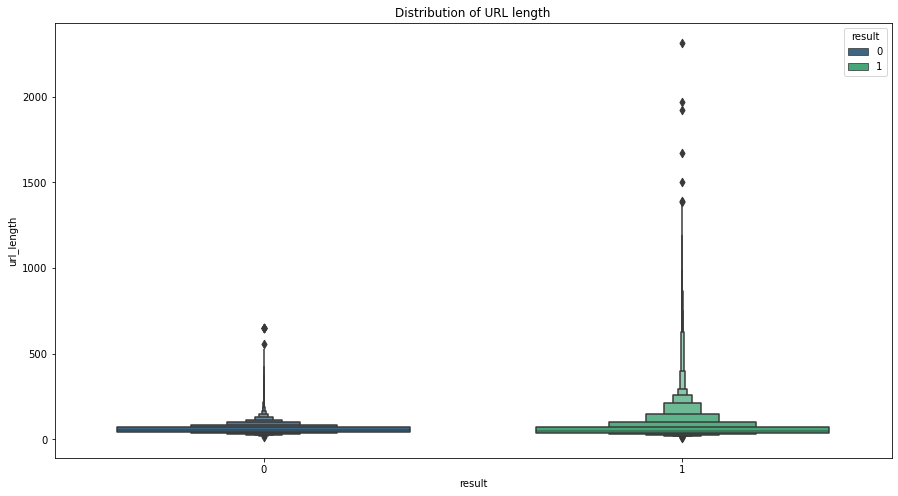

In [6]:
#visualizing the data
from re import X
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
#plotting the distribution of the url length
sns.boxenplot(data=df,x='result',y='url_length',hue='result',palette='viridis',dodge=False,orient='v',linewidth=1.5,
              width=0.7)
plt.title('Distribution of URL length')
plt.show()


The above plot of URL lenghts show that the variablity in lenghts for 'malicious' urls are very high compared to 'benign' urls. There are some extreme outliers as well.

In [7]:
#df['encrypted_url'] = pd.to_numeric(df['encrypted_url'], errors='coerce')
df = df.dropna(subset=['encrypted_url'])

In [8]:
df = df.drop_duplicates()

### Model Training

In [9]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Check for missing values in 'encrypted_url'
missing_values = df['encrypted_url'].isnull().sum()

# If there are missing values, replace them with a placeholder string
if missing_values > 0:
    df['encrypted_url'] = df['encrypted_url'].fillna('missing')

#imputer = SimpleImputer(strategy='constant', fill_value='missing')
#df['encrypted_url'] = imputer.fit_transform(df[['encrypted_url']])[:, 0]

label_encoder = LabelEncoder()
df['encrypted_url'] = label_encoder.fit_transform(df['encrypted_url'])



#### KMeans Clustering

In [10]:
X = df[['encrypted_url']]
kmeans = KMeans(n_clusters=2,init='random',max_iter=1000,n_init=10,random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
print(confusion_matrix(df['cluster'],df['result']))
print(classification_report(df['cluster'], df['result']))
print(accuracy_score(df['cluster'], df['result']))
print(roc_auc_score(df['cluster'],df['result']))


[[185503  33108]
 [160235  71330]]
              precision    recall  f1-score   support

           0       0.54      0.85      0.66    218611
           1       0.68      0.31      0.42    231565

    accuracy                           0.57    450176
   macro avg       0.61      0.58      0.54    450176
weighted avg       0.61      0.57      0.54    450176

0.5705168645152118
0.5782936851074518


KMeans is very succeptible to imbalance in the data and hence we can expect lower accuracy.

Gaussian Mixture Models (GMMs) are a type of probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.

Unlike KMeans, which is a hard clustering method, GMM is a soft clustering method that provides the probability of a data point belonging to each cluster. This can be beneficial in handling imbalanced data because it doesn't strictly assign a data point to a single cluster, but rather gives a distribution of probabilities.

However, GMMs do not inherently handle class imbalance. They will still be affected by the imbalance in the data because they estimate the probability density function of the input data, and this estimation is influenced by the number of points from each class.

In the context of imbalanced data, it's important to note that GMMs (and clustering algorithms in general) are unsupervised learning methods and do not take class labels into account during the learning process. Therefore, the concept of class imbalance is somewhat less relevant for these methods than it is for supervised learning methods.

#### Gaussian Mixture Model

In [12]:
#Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=42, covariance_type='diag')
gmm.fit(X)
df['gmm_cluster'] = gmm.predict(X)

In [118]:
df['cluster'].unique()

array([1, 0])

In [13]:
print(confusion_matrix(df['gmm_cluster'],df['result']))
print(classification_report(df['gmm_cluster'], df['result']))
print(accuracy_score(df['gmm_cluster'], df['result']))
print(roc_auc_score(df['gmm_cluster'],df['result']))

[[195865  33468]
 [149873  70970]]
              precision    recall  f1-score   support

           0       0.57      0.85      0.68    229333
           1       0.68      0.32      0.44    220843

    accuracy                           0.59    450176
   macro avg       0.62      0.59      0.56    450176
weighted avg       0.62      0.59      0.56    450176

0.5927348414842195
0.5877116296096189


In [15]:
df_copy = df.copy()
df_copy = df_copy.drop(['url', 'label','result','domain','domain_to_digit','cluster'], axis=1)

#### Using Majority Voting on KMeans

In [16]:
from scipy.stats import mode

In [17]:
n_clusters = 2

# Create multiple kmeans models
kmeans_1 = KMeans(n_clusters=n_clusters, random_state=0,init='k-means++',algorithm='lloyd').fit(df_copy)
kmeans_2 = KMeans(n_clusters=n_clusters, random_state=1,init='random',algorithm='elkan').fit(df_copy)

kmeans_3 = KMeans(n_clusters=n_clusters, random_state=2,init='k-means++',max_iter=300,n_init=20).fit(df_copy)

# Create an array where each row is a data point and each column is the prediction of a model
cluster_runs = np.array([kmeans_1.labels_, kmeans_2.labels_, kmeans_3.labels_])

# Use majority voting to find the consensus set of clusters
consensus_cluster_labels, _ = mode(cluster_runs)



In [18]:
df['consensus_cluster_labels'] = consensus_cluster_labels


In [19]:
print(confusion_matrix(df['consensus_cluster_labels'],df['result']))
print(classification_report(df['consensus_cluster_labels'], df['result']))
print(accuracy_score(df['consensus_cluster_labels'], df['result']))
print(roc_auc_score(df['consensus_cluster_labels'],df['result']))

[[160154  71308]
 [185584  33130]]
              precision    recall  f1-score   support

           0       0.46      0.69      0.55    231462
           1       0.32      0.15      0.21    218714

    accuracy                           0.43    450176
   macro avg       0.39      0.42      0.38    450176
weighted avg       0.39      0.43      0.38    450176

0.42935207563264144
0.421699934767365


Majority Voting technique is not the best technique to use, but just tried to incorporate it. It definitely underperformed compared to conventional K-Means as the Majority voting assumes that all voters (or classifiers) are equally reliable and independent. However, if the voters are too similar (e.g., using the same underlying model), their errors may be correlated, leading to suboptimal results.
 

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   url_length            450176 non-null  int64
 1   number_digits         450176 non-null  int64
 2   special_characters    450176 non-null  int64
 3   alphabet              450176 non-null  int64
 4   sum_special_alphabet  450176 non-null  int64
 5   encrypted_url         450176 non-null  int32
 6   gmm_cluster           450176 non-null  int64
dtypes: int32(1), int64(6)
memory usage: 22.3 MB


In [21]:
df_copy.drop(['gmm_cluster'], axis=1, inplace=True)

### GMM in a semi-supervised setting

The below technique was adopted from [Scikit-learn](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py)

This is basically a semi-supervised learning approach, where the clustering model remains unsupervised but the hyperparameters of the clustering model are tuned in a supervised way using the ground truth labels.


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
X= df_copy
y= df['result']
train_index, test_index = next(iter(skf.split(X,y)))
X_train = X.iloc[train_index]
y_train = y.iloc[train_index]
X_test = X.iloc[test_index]
y_test = y.iloc[test_index]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=300, random_state=42
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred == y_train) * 100
    print(f'train_accuracy_{name}: {train_accuracy}')


    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred == y_test) * 100
    print(f'test_accuracy_{name}: {test_accuracy}')



(337632, 6) (112544, 6) (337632,) (112544,)
train_accuracy_spherical: 62.685705146431616
test_accuracy_spherical: 38.921666192777934
train_accuracy_diag: 68.6644038479765
test_accuracy_diag: 68.48254904748366
train_accuracy_tied: 67.38668135721733
test_accuracy_tied: 45.469327551890814
train_accuracy_full: 68.29269737465643
test_accuracy_full: 70.12457350014216


In [ ]:
#GMM using full covariance
gmm = GaussianMixture(n_components=2, random_state=42, covariance_type='full',
                      means_init=np.array([X_train[y_train == i].mean(axis=0) for i in range(n_classes)]))
gmm.fit(X_train)
y_train_pred = gmm.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train) * 100
print(f'train_accuracy_full: {train_accuracy}')

y_test_pred = gmm.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f'test_accuracy_full: {test_accuracy}')


train_accuracy_full: 68.29269737465643
test_accuracy_full: 70.12457350014216


In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

337632 112544 337632 112544


### Gaussion Mixture Model with Gradiant Boosting

Reference Paper:

https://thesai.org/Downloads/Volume15No2/Paper_92-Enhancing_K_means_Clustering_Results_with_Gradient_Boosting.pdf

#### Approach:

Now knowing the GMM using full covariance performs better compared to others, it's performance is enhanced using Gradiant Boosting algorithm on the misclassified training examples. It works by taking the GMM predicions and splitting it according to a Split Criterion(SC).

The SC method begins by calculating the Euclidean distance between each data point and the centers of all clusters. For each point x, the minimum distance from it to each center is determined and referred to as minxc. Then, minxc is divided by the distance of each centroid to the point. This yields values between 0 and 1, representing the ratio of the minimum distance from point x to cluster c to each cluster center.

A threshold value between 0 and 1 is chosen to identify the misclassified data points. If any of the values calculated for data point x exceeds the chosen threshold, then x is considered misclassified. However, the point with the minimum distance to a cluster to which the point belongs is excluded from the comparison with the threshold since it will also result in 1.

For instance, if a point x1 and three centers c1, c2, and c3 are given, the distance between this point and the three cluster centers is calculated, resulting in three distances: dist(x1, c1), dist(x1, c2), and dist(x1, c3). Then, the minimum distance (say dist(x1, c2)) is determined, and the SC result R of each distance can be calculated as follows:

SC(x1, c1) = dist(x1, c2) / dist(x1, c1) = R (0 ≤ R ≤ 1)
SC(x1, c2) = dist(x1, c2) / dist(x1, c2) = R (R = 1)
SC(x1, c3) = dist(x1, c2) / dist(x1, c3) = R (0 ≤ R ≤ 1)
If the value obtained from Eq. (2) or (4) exceeds the specified threshold, the data point x1 is considered misclassified. The minimum distance to the cluster, represented as dist(x1, c2), is excluded from the comparison according to Eq. (3), resulting in a value of 1.

The SC method is a moderate technique for identifying misclassified data points in GMM. By utilizing the threshold value, the SC technique can identify misclassified points so they can be minimized, thereby improving the accuracy of the clustering algorithm.

Post-processing is a technique used with clustered data of GMM to improve the accuracy and quality of the resulting clusters . In this phase, possibly misclassified labels are detected, and a corrective process is applied to obtain more accurate results. This study incorporates gradient boosting as a post-processing technique after applying the SC method.

Gradient boosting is a popular machine learning method utilized for regression and classification tasks. It involves combining multiple weak models, usually decision trees, to form a powerful model that can make precise predictions. Gradient boosting is effective in handling imbalanced datasets, noisy data, and high-dimensional data.



In [24]:
from sklearn.metrics import pairwise_distances

def split_criterion_gmm(X, n_clusters, threshold=0.5):
    # Fit GMM
    n_classes = 2
    gmm = GaussianMixture(n_components=2, random_state=42, covariance_type='full',
                      means_init=np.array([df_copy[df['result'] == i].mean(axis=0) for i in range(n_classes)]))
    gmm.fit(df_copy)
    df_copy_pred = gmm.predict(df_copy)
    
    # Calculate distances from each point to each cluster center
    distances = pairwise_distances(df_copy, gmm.means_, metric='euclidean')

    # Calculate minxc for each point
    minxc = np.min(distances, axis=1)

    # Calculate SC ratio for each point and each cluster
    sc_ratios = np.divide(minxc[:, np.newaxis], distances)

    
    # Identify misclassified points
    misclassified_points = []
    for i, (label, sc_ratio) in enumerate(zip(df_copy_pred, sc_ratios)):
        # Exclude the minimum distance to the cluster it belongs to
        sc_ratio[label] = 0
        # Check if any SC ratio exceeds the threshold
        if np.any(sc_ratio > threshold):
            misclassified_points.append(i)

    # Return the original GMM labels and the indices of misclassified points
    return df_copy_pred, misclassified_points

In [25]:
df_copy_pred, misclassified_points=split_criterion_gmm(df_copy, 2, threshold=0.5)


In [26]:
print(len(df_copy_pred), len(misclassified_points))

450176 439174


In [39]:
misclassified_points_set = set(misclassified_points)
gmm_pred_label_ind = [ind for ind, label in enumerate(df_copy_pred) if ind not in misclassified_points_set]

correctly_classified_inds = gmm_pred_label_ind
len(gmm_pred_label_ind)

11002

In [28]:
X_test_after_split =df_copy.iloc[misclassified_points]
y_test_after_split = df['result'].iloc[misclassified_points]
print(len(X_test_after_split), len(y_test_after_split))

439174 439174


In [30]:
from sklearn.ensemble import GradientBoostingClassifier


# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,  random_state=0)

# Fit the Gradient Boosting Classifier on the original features and cluster labels
gbc.fit(df_copy,df_copy_pred )

# Predict the cluster labels using Gradient Boosting Classifier
predicted_labels = gbc.predict(X_test_after_split)





In [45]:
X_test_after_split.index
my_dict ={}
my_dict = {ind: None for ind in X_test_after_split.index}
for ind, val in zip(dict.keys(), predicted_labels):
    my_dict[ind] = val
        

In [31]:
len(predicted_labels)

439174

In [59]:
df['final_result'] = df_copy_pred


In [62]:
pd.Series(my_dict)

0         0
1         0
2         0
3         0
4         0
         ..
450171    0
450172    1
450173    1
450174    0
450175    1
Length: 439174, dtype: int64

In [63]:
df['final_result'].update(pd.Series(my_dict))

In [64]:
accuracy_score(df['result'],df['final_result'])

0.6536710086721638

In [66]:
print(classification_report(df['result'],df['final_result']))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77    345738
           1       0.27      0.29      0.28    104438

    accuracy                           0.65    450176
   macro avg       0.53      0.53      0.53    450176
weighted avg       0.66      0.65      0.66    450176



### Conclusion
With the adoption of GMM with GBA increased the accuracy of predicion by 6% compared to traditional GMM clustering model and an increase in accuracy of 11% compared to K-Means Clustering.

### Further Improvements:

1. By choosing a well balanced dataset GMM's performance can be improved
2. Algorithm to encode the URLs can be made more sophasticated to respond well to the clustering algorithms.